In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose magnet type and day to analyse

In [3]:
magnetTypes = ['MB']
selectedYear = 2018

# Read CSV as a dataframe

In [5]:
fileName = 'output/{}/{}_multi_events_multi_day.csv'.format(magnetTypes[0], magnetTypes[0])
data = pd.read_csv(fileName) 
# Preview the first 5 lines of the loaded data 
data.head()

timestamp  I_HDS_4_max  I_HDS_3_max  I_HDS_2_max  I_HDS_1_max  \
0  1516199273976000000     0.085833     0.087740    93.231804    25.391308   
1  1516287813696000000     0.072481     0.080111     0.068666     0.070574   
2  1516875995339000000     1.855900     1.937918    93.231804    25.391308   
3  1516877472371000000     0.085833     0.085833     0.087740     0.089648   
4  1516879225463000000     0.083926     0.078203    93.231804    25.391308   

   U_HDS_4_max  U_HDS_3_max  U_HDS_2_max  U_HDS_1_max  I_HDS_4_min  \
0     0.996635     4.925675  1092.560700     3.200730     0.085833   
1    12.208775    11.940450     1.111631     1.744111     0.072481   
2    28.039932     4.925675  1092.560700     1.226627     1.855900   
3     2.549085     3.737380     2.472421     2.932406     0.085833   
4     0.958302     4.925675  1092.560700     1.322457     0.083926   

      ...       U_HDS_2_0  U_HDS_1_0  I_HDS_4_end  I_HDS_3_end  I_HDS_2_end  \
0     ...        0.843306   0.000000     0.080111     0.082018     0.080111   
1     ...        1.034967   1.705779     0.068666     0.072481     0.064852   
2     ...        0.862472   0.000000     0.080111     0.074389     0.074389   
3     ...        0.785808   0.766642     0.082018     0.082018     0.085833   
4     ...        0.862472   0.000000     0.078203     0.074389     0.074389   

   I_HDS_1_end  U_HDS_4_end  U_HDS_3_end  U_HDS_2_end  U_HDS_1_end  
0     0.076296     0.862472     0.919970     0.804974     0.862472  
1     0.064852    12.132110    11.863785     1.054133     1.705779  
2     0.076296     0.843306     0.900804     0.862472     0.919970  
3     0.087740     0.843306     0.881638     0.804974     0.766642  
4     0.076296     0.843306     0.900804     0.862472     0.939136  

[5 rows x 49 columns]

# Display number of events

In [19]:
print("Loaded {} events for {} in {}".format(len(data), magnetTypes[0], selectedYear))

Loaded 3807 events for MB in 2018


# Plot histograms of maximum current

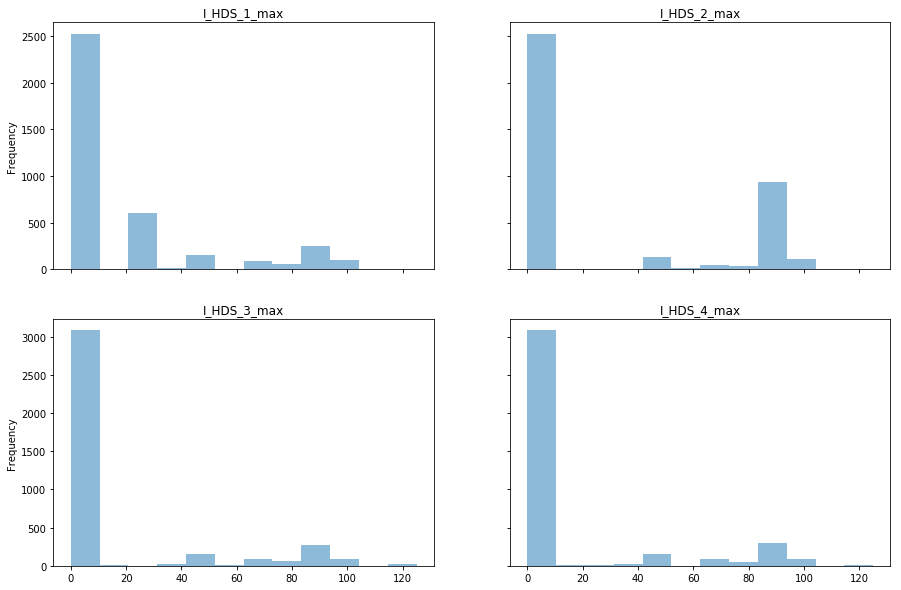

In [34]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15, 10))
data['I_HDS_1_max'].plot.hist(bins=12, ax=ax[0,0], alpha=0.5, title = "I_HDS_1_max")
data['I_HDS_2_max'].plot.hist(bins=12, ax=ax[0,1], alpha=0.5, title = "I_HDS_2_max")
data['I_HDS_3_max'].plot.hist(bins=12, ax=ax[1,0], alpha=0.5, title = "I_HDS_3_max")
data['I_HDS_4_max'].plot.hist(bins=12, ax=ax[1,1], alpha=0.5, title = "I_HDS_4_max")

# Plot histograms of maximum voltage

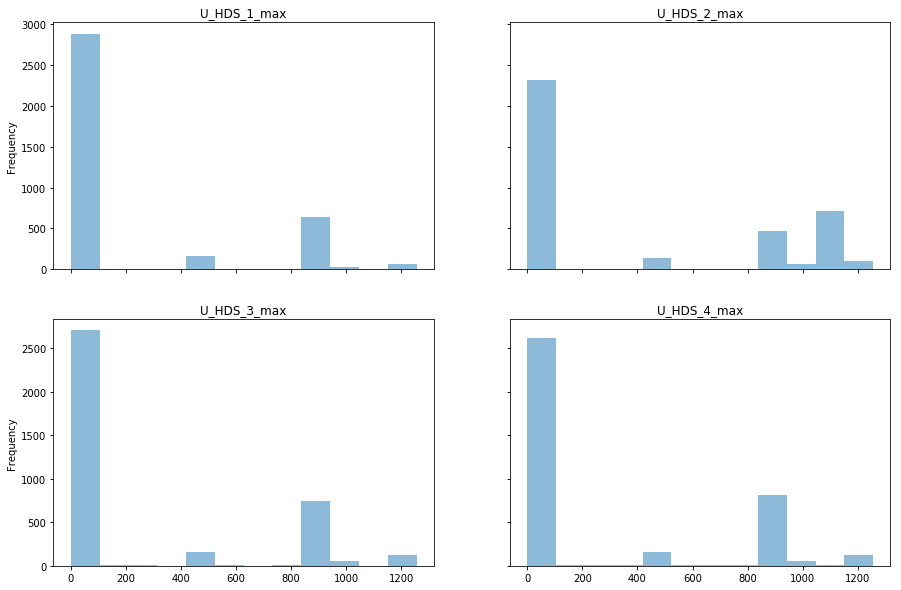

In [35]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(15, 10))
data['U_HDS_1_max'].plot.hist(bins=12, ax=ax[0,0], alpha=0.5, title = "U_HDS_1_max")
data['U_HDS_2_max'].plot.hist(bins=12, ax=ax[0,1], alpha=0.5, title = "U_HDS_2_max")
data['U_HDS_3_max'].plot.hist(bins=12, ax=ax[1,0], alpha=0.5, title = "U_HDS_3_max")
data['U_HDS_4_max'].plot.hist(bins=12, ax=ax[1,1], alpha=0.5, title = "U_HDS_4_max")

# Filter out spurious PM dumps
- start and final value do not differ by more than X %
- signal to noise ration less than Y
- start value of voltage less then 50 % of the reference charging voltage
- final value greater than minimum value by Z %

# Get operating current from PM/CALS
- for a given magnet name get the sector number
- query from CALS the operating current at the moment of an event
- get beam mode at the moment of an event

In [ ]:
#     print("Querying CALS: {} from {} to {}".format(arcCurrentName, t1, t2))

#     signal = Signal()
#     signal.read('cals', True, name=arcCurrentName, startTime=t1, endTime=t2)
#     arcCurrent = signal.getSynchronizedDF()
    
#     maxArcCurrent = arcCurrent.max()
#     print("Operating current at the moment of the event: {}".format(maxArcCurrent[0]))
#     rowFeatureDF[arcCurrentName] = maxArcCurrent[0]

# Filter out PM events during operation and during HWC
- at 0 current: QH powering during HWC
- at nominal current: QH powering during stable beams
- at intermediate currents: all other cases

# For a regular QH discharges calculate
- time constant for voltage (from exponential signal squared and logarithm)
- time constant for current (MB)
- calculate resistance (MB)
- calculate derivative of resistance (MB)